Import de Bibliotecas

In [578]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Leitura de arquivos e entendimento das tabelas

In [579]:
df1 = pd.read_csv("https://github.com/Czaarx/porfolio-dados/raw/refs/heads/main/index_1.csv")
df2 = pd.read_csv("https://github.com/Czaarx/porfolio-dados/raw/refs/heads/main/index_2.csv")

In [580]:
df1.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [581]:
df2.head()

,date,datetime,cash_type,money,coffee_name
0,2025-02-08,2025-02-08 14:26:04,cash,15.0,Tea
1,2025-02-08,2025-02-08 14:28:26,cash,15.0,Tea
2,2025-02-08,2025-02-08 14:33:04,card,20.0,Espresso
3,2025-02-08,2025-02-08 15:51:04,card,30.0,Chocolate with coffee
4,2025-02-08,2025-02-08 16:35:01,cash,27.0,Chocolate with milk


In [582]:
# Verificando informações dos DataFrames
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         262 non-null    object 
 1   datetime     262 non-null    object 
 2   cash_type    262 non-null    object 
 3   money        262 non-null    float64
 4   coffee_name  262 non-null    object 
dtypes: float64(1), object(4)
memory usage: 10.4+ KB
None


Limpeza de dados

In [583]:
# Criando coluna dummy para equalizar o numero de colunas

df2["card"] = None
df2.head()

,date,datetime,cash_type,money,coffee_name,card
0,2025-02-08,2025-02-08 14:26:04,cash,15.0,Tea,None
1,2025-02-08,2025-02-08 14:28:26,cash,15.0,Tea,None
2,2025-02-08,2025-02-08 14:33:04,card,20.0,Espresso,None
3,2025-02-08,2025-02-08 15:51:04,card,30.0,Chocolate with coffee,None
4,2025-02-08,2025-02-08 16:35:01,cash,27.0,Chocolate with milk,None


In [584]:
#Convertendo datatype de datetime para datetime64 (necessario para utilizar colunas ano, mes e dia)

df1["datetime"] = pd.to_datetime(df1["datetime"])
df2["datetime"] = pd.to_datetime(df1["datetime"])

In [585]:
#Concatenando DataFrames

df = pd.concat([df1, df2], ignore_index=True)

In [586]:
# Criando colunas hora, dia, mes, ano
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day_name()
df['month'] = df['datetime'].dt.month_name()
df['year'] = df['datetime'].dt.year

df_limpo = df 
df_limpo.head()

,date,datetime,cash_type,card,money,coffee_name,hour,day,month,year
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10,Friday,March,2024
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,Friday,March,2024
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,Friday,March,2024
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13,Friday,March,2024
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13,Friday,March,2024


In [587]:
# Renomeando colunas

nomes_colunas = {
    "date": "Data",
    "datetime": "Data e Hora",
    "cash_type": "Tipo de Pagamento",
    "card": "Cartao",
    "money": "Valor",
    "coffee_name": "Nome do Café",
    "hour": "Hora",
    "day": "Dia",
    "month": "Mês",
    "year": "Ano"    
}

df_limpo.rename(columns=nomes_colunas, inplace=True)
df_limpo.columns

Index(['Data', 'Data e Hora', 'Tipo de Pagamento', 'Cartao', 'Valor',
       'Nome do Café', 'Hora', 'Dia', 'Mês', 'Ano'],
      dtype='object')

In [588]:
# Renomeando linhas de Tipo de Pagamento
df_limpo["Tipo de Pagamento"] = df_limpo["Tipo de Pagamento"].replace({
    "card": "Cartão",
    "cash": "Dinheiro"
})

df_limpo["Tipo de Pagamento"].value_counts()

Tipo de Pagamento
Cartão      3729
Dinheiro     169
Name: count, dtype: int64

In [589]:
#Renomeando Linhas do dia 

df_limpo["Dia"] = df_limpo["Dia"].replace({
    "Monday": "Segunda",
    "Tuesday": "Terça",
    "Wednesday": "Quarta",
    "Thursday": "Quinta",
    "Friday": "Sexta",
    "Saturday": "Sábado",
    "Sunday": "Domingo"
})


In [590]:
#Renomeando Linhas do Mes

df_limpo["Mês"] = df_limpo["Mês"].replace({
    "January": "Janeiro",
    "February": "Fevereiro",
    "March": "Março",
    "April": "Abril",
    "May": "Maio",
    "June": "Junho",
    "July": "Julho",
    "August": "Agosto",
    "September": "Setembro",
    "October": "Outubro",
    "November": "Novembro",
    "December": "Dezembro"
}) 

In [591]:
# Padronização dos nomes dos cafés para evitar duplicatas
df_limpo["Nome do Café"] = df_limpo["Nome do Café"].str.strip().str.title()

Criação de análise dos gráficos

Preferencia de pagamento

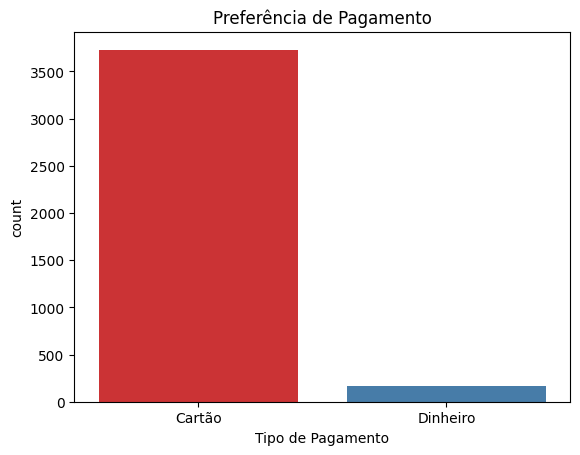

In [592]:
# Grafico mostrando preferencia de pagamento cartao x dinheiro
sns.countplot(
    data=df_limpo,
    x="Tipo de Pagamento",
    hue="Tipo de Pagamento",
    palette="Set1",
    legend=False
)
plt.title("Preferência de Pagamento")
plt.show()

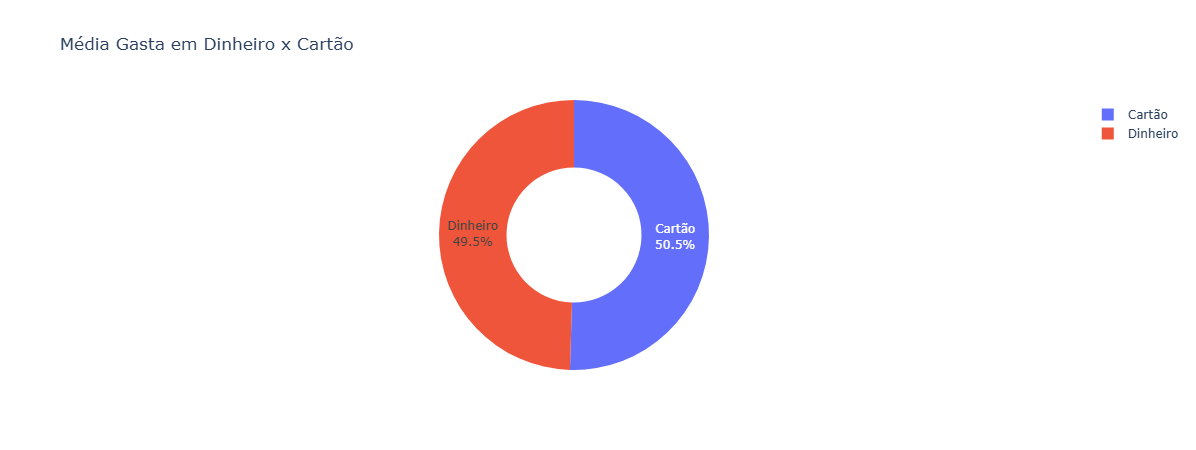

In [ ]:
# grafico mostrando comparacao mediana dos gastos por metodo de pagamento 
comparacao_pagamento = df_limpo.groupby("Tipo de Pagamento")["Valor"].mean().reset_index()
comparacao_pagamento.columns = ["Tipo de Pagamento", "Valor Médio"]

fig = px.pie(comparacao_pagamento,
             names='Tipo de Pagamento',
             values='Valor Médio',
             title='Média Gasta em Dinheiro x Cartão',
             hole =0.5
)

fig.update_traces(textinfo='percent+label')
fig.show()

#mostrar imagem no github
from IPython.display import Image
Image("newplot.png")

Text(0, 0.5, 'Valor')

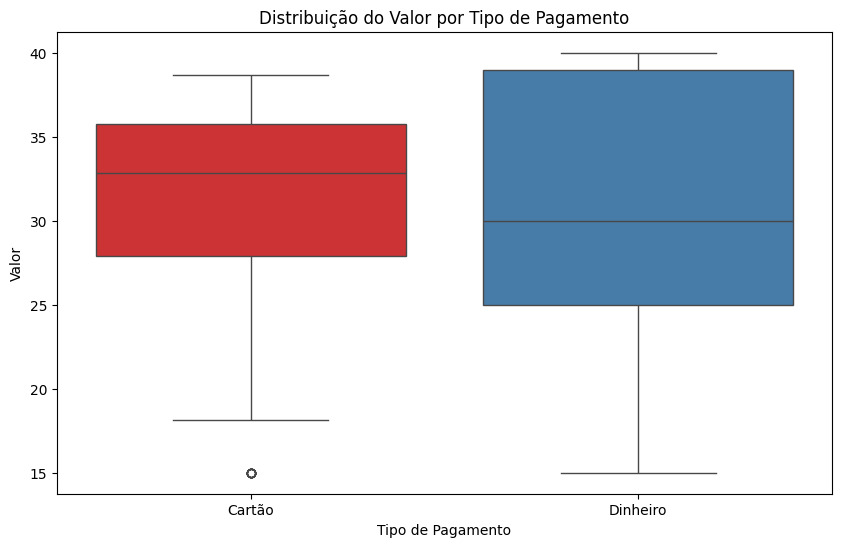

In [594]:
# Gráfico mostrando a distribuição dos gastos por método de pagamento
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Tipo de Pagamento',
    y='Valor',
    data=df_limpo,
    palette="Set1",
    hue = 'Tipo de Pagamento',
    legend=False,
)
plt.title('Distribuição do Valor por Tipo de Pagamento')
plt.xlabel('Tipo de Pagamento')
plt.ylabel('Valor')

Conclusão:

A partir da análise, temos o seguinte entendimento por método de pagamento:

Cartão: É o método de pagamento mais utilizado, representando a maior parte das transações. Os valores estão mais próximos da mediana, indicando compras padronizadas, sem ocorrência frequente de valores extremamente altos ou muito baixos. Isso sugere um uso recorrente para compras de ticket médio estável.

Dinheiro: Apesar de ter uma participação significativamente menor nas transações, apresenta maior dispersão nos valores. Isso indica que, embora seja utilizado com menor frequência, é escolhido para compras pontuais que, em alguns casos, possuem valores elevados, aumentando a variação e distanciando parte das transações da mediana.

Análise de Produtos

C:\Users\Administrador\AppData\Local\Temp\ipykernel_20692\214409859.py:7: UserWarning:


The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.



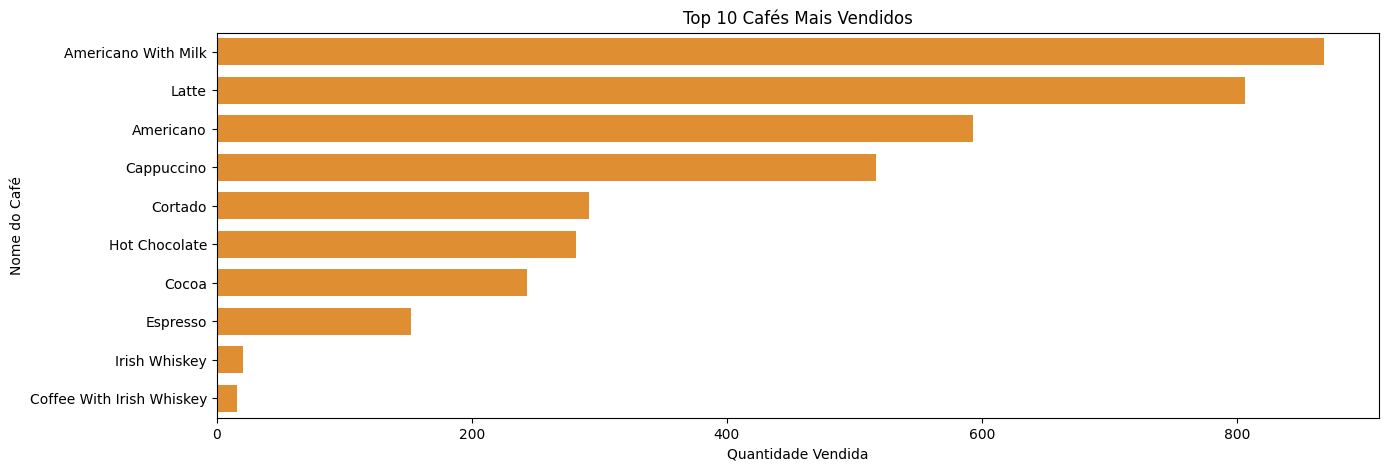

In [595]:
#Coletando os 10 Produtos mais Vendidos 

mais_vendidos = df_limpo["Nome do Café"].value_counts().head(10).reset_index()
mais_vendidos.columns = ["Nome do Café", "Quantidade Vendida"]

plt.figure(figsize=(15,5))
sns.barplot(
    data=mais_vendidos,
    y = "Nome do Café", 
    x = "Quantidade Vendida",
    width=0.7,
    palette=["#fc9015"],
    hue="Nome do Café",
    legend=False
    )
plt.title('Top 10 Cafés Mais Vendidos')
plt.ylabel('Nome do Café')
plt.xlabel('Quantidade Vendida')
plt.show()

C:\Users\Administrador\AppData\Local\Temp\ipykernel_20692\927362474.py:6: UserWarning:


The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.



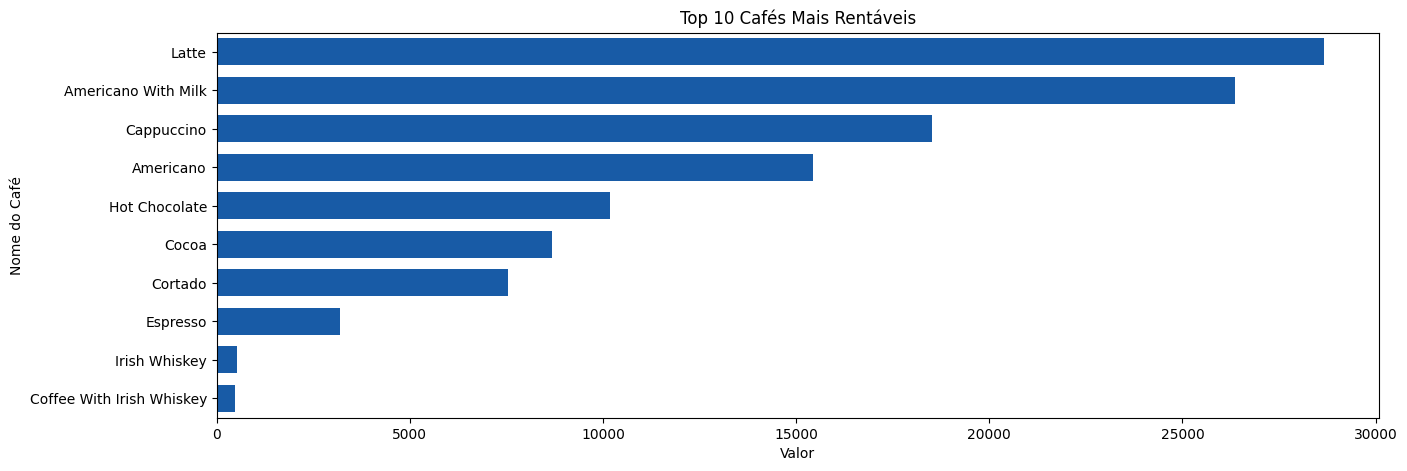

In [596]:
# Coletando os produtos que mais geram lucro

mais_rentaveis = df_limpo.groupby("Nome do Café")["Valor"].sum().reset_index().sort_values(by="Valor", ascending=False).head(10)

plt.figure(figsize=(15,5))
sns.barplot(
    data=mais_rentaveis,
    y = "Nome do Café", 
    x = "Valor",
    width=0.7,
    palette=["#0059be"],
    hue="Nome do Café",
    legend=False
    )
plt.title('Top 10 Cafés Mais Rentáveis')
plt.ylabel('Nome do Café')
plt.xlabel('Valor')
plt.show()

Faturamento por Hora, utilizando ambos DataSets

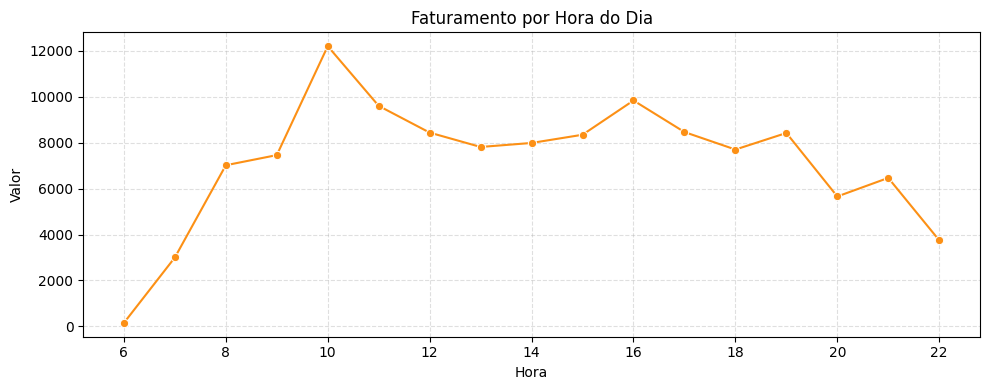

In [597]:
vendas_por_hora = df_limpo.groupby("Hora")["Valor"].sum().reset_index()
plt.figure(figsize=(10,4))
sns.lineplot(data=vendas_por_hora, x="Hora", y="Valor", color="#fc9015", marker="o")
plt.title("Faturamento por Hora do Dia")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Faturamento (Comparando apenas o mês de Março, pois é o único que possui dados em ambos DataSets)

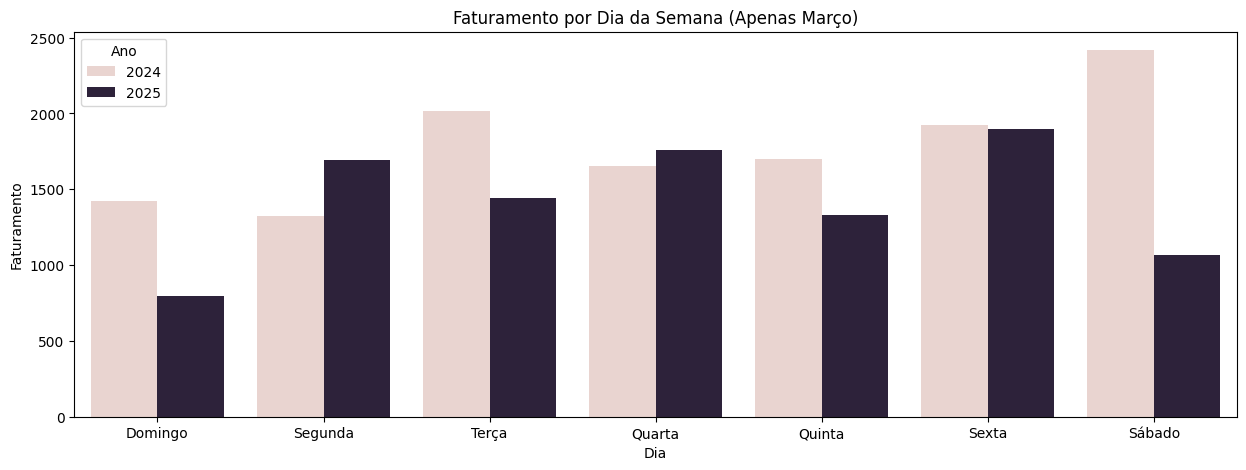

In [598]:
ordem_dia = ["Domingo", "Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado"]

faturamento_marco = df_limpo[(df_limpo["Mês"] == "Março") & (df_limpo["Ano"].isin([2024,2025]))] 
faturamento_dia = faturamento_marco.groupby(["Ano","Dia"])["Valor"].sum().reset_index()

plt.figure(figsize=(15, 5))
sns.barplot(
    data=faturamento_dia,
    x="Dia",
    y="Valor",
    hue="Ano",
    order=ordem_dia
)

plt.title("Faturamento por Dia da Semana (Apenas Março)")
plt.xlabel("Dia")
plt.ylabel("Faturamento")
plt.show()

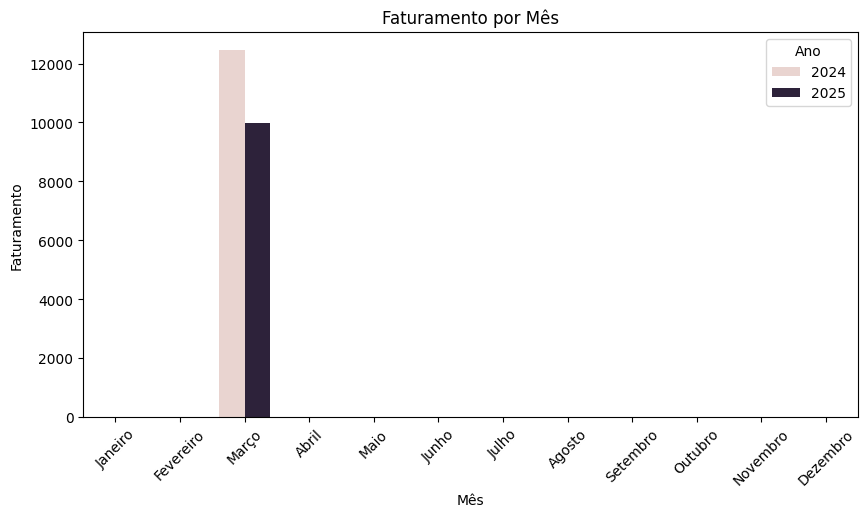

In [599]:
ordem_mes = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]
faturamento_mes = faturamento_marco.groupby(["Ano","Mês"])["Valor"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(
    data=faturamento_mes,
    x="Mês",
    y="Valor",
    hue="Ano",
    order=ordem_mes
)

plt.title("Faturamento por Mês")
plt.xlabel("Mês")
plt.ylabel("Faturamento")
plt.xticks(rotation=45)
plt.show()